In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [2]:
raw_path: str = "../../data/raw"
processed_path: str = "../../data/processed"
submission_path: str = "../../data/submission"
pd.set_option('display.max_columns', None)

train: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"train.csv"))
test: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"test.csv"))
interest: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"interestRate.csv"))
park: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"parkInfo.csv"))
school: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"schoolinfo.csv"))
subway: pd.DataFrame = pd.read_csv(os.path.join(raw_path,"subwayInfo.csv"))

train["_type"] = "train"
test["_type"] = "test"
train['original_index'] = train.index
test['original_index'] = test.index

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801228 entries, 0 to 1801227
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   index                int64  
 1   area_m2              float64
 2   contract_year_month  int64  
 3   contract_day         int64  
 4   contract_type        int64  
 5   floor                int64  
 6   built_year           int64  
 7   latitude             float64
 8   longitude            float64
 9   age                  int64  
 10  deposit              float64
 11  _type                object 
 12  original_index       int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 178.6+ MB


In [13]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   17564 non-null  float64
 1   longitude  17564 non-null  float64
 2   area       17564 non-null  float64
dtypes: float64(3)
memory usage: 411.8 KB


In [4]:
v9: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"v9.csv"))
v9

,index,_type,contract_year_month,contract_day,area_m2,contract_date_numeric,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,apt_idx,area,grid_deposit,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,interest_rate,grid_id,nearest_park_distance,nearest_park_idx,park_grid_id,park_area,nearest_school_distance,nearest_school_idx,school_grid_id,nearest_subway_distance,nearest_subway_idx,subway_grid_id,park_count,school_count,subway_count,date_length,contract_date,contract_timestamp
0,0,train,201906,25,84.9981,20190625,9,2019,37.054314,127.045216,0,False,False,17000.0,0,25.8,25581.836691,7683,29300,NaN,1.78,520,498.618918,9759,420.0,3898.0,156.120431,6739,521.0,716.952948,12,521.0,9.0,15,1,8,2019-06-25,1561388400
1,1,train,202003,26,84.9981,20200326,20,2019,37.054314,127.045216,1,False,False,23000.0,0,25.8,25581.836691,7683,29300,17000.0,1.26,520,498.618918,9759,420.0,3898.0,156.120431,6739,521.0,716.952948,12,521.0,9.0,15,1,8,2020-03-26,1585148400
2,2,train,202003,28,84.9981,20200328,8,2019,37.054314,127.045216,1,False,False,23000.0,0,25.8,25581.836691,7683,29300,23000.0,1.26,520,498.618918,9759,420.0,3898.0,156.120431,6739,521.0,716.952948,12,521.0,9.0,15,1,8,2020-03-28,1585321200
3,3,train,201907,15,59.3400,20190715,1,1986,36.964647,127.055847,33,False,False,5000.0,1,18.0,18375.213675,18366,58901,NaN,1.68,121,169.839678,9139,121.0,1616.0,214.559689,6535,121.0,3897.279708,10,222.0,7.0,3,1,8,2019-07-15,1563116400
4,4,train,201904,12,59.8100,20190412,6,1995,36.972390,127.084514,24,False,False,1800.0,2,18.1,12627.879781,18369,58863,NaN,1.85,222,382.401815,9201,122.0,3986.0,1708.489263,6589,222.0,2039.685349,10,222.0,1.0,6,1,8,2019-04-12,1554994800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,test,202402,27,115.5101,20240227,17,2010,37.528394,126.659398,14,True,False,NaN,17869,35.0,33310.656662,6088,25360,37000.0,3.62,226,398.113485,14160,226.0,8963.9,224.754177,9387,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-02-27,1708959600
1951396,150168,test,202403,2,142.8738,20240302,4,2010,37.528394,126.659398,14,True,False,NaN,17869,43.3,33310.656662,6088,17911,43000.0,3.59,226,398.113485,14160,226.0,8963.9,224.754177,9387,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-02,1709305200
1951397,150169,test,202403,16,142.8738,20240316,13,2010,37.528394,126.659398,14,False,True,NaN,17869,43.3,33310.656662,6088,17911,43000.0,3.59,226,398.113485,14160,226.0,8963.9,224.754177,9387,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-16,1710514800
1951398,150170,test,202403,22,114.9285,20240322,2,2010,37.528394,126.659398,14,False,True,NaN,17869,34.8,33310.656662,6088,24128,32500.0,3.59,226,398.113485,14160,226.0,8963.9,224.754177,9387,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-22,1711033200


In [37]:
v9[v9["apt_idx"] == 15571][['index', 'apt_idx', 'area_m2', 'deposit', 'recent_deposit']]

,index,apt_idx,area_m2,deposit,recent_deposit
1260709,1260709,15571,273.96,930000.0,NaN
1406833,1406833,15571,273.96,1100000.0,930000.0
1539384,1539384,15571,273.96,570000.0,1100000.0
1542638,1542638,15571,273.96,1000000.0,570000.0


In [38]:
pd.set_option('display.max_rows', None)
v9[v9["index"].isin([1418205, 1418267, 1418302, 1418303, 1418305])][['index','contract_year_month','built_year', 'latitude', 'longitude', 'apt_idx', 'deposit', 'recent_deposit']]


,index,contract_year_month,built_year,latitude,longitude,apt_idx,deposit,recent_deposit
1418205,1418205,202207,2010,37.617512,127.020827,8996,38580.0,45000.0
1418267,1418267,202207,2010,37.617512,127.020827,8996,42000.0,44000.0
1418302,1418302,202207,2010,37.617512,127.020827,8996,7568.0,7007.0
1418303,1418303,202207,2010,37.617512,127.020827,8996,7569.0,7569.0
1418305,1418305,202207,2010,37.617512,127.020827,8996,7569.0,7569.0


In [22]:
columns = ['index','_type',
    'contract_date_numeric', 
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1', 
    'deposit', 
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
]

# v9에서 숫자형 컬럼만 선택
df = v9.filter(items=columns)

# 'deposit'과의 상관계수 계산
correlation_with_deposit = df.drop(columns=['_type', 'index']).corr()['deposit'].abs()

# 상관계수를 내림차순으로 정렬
sorted_correlation = correlation_with_deposit.sort_values(ascending=False)

# 정렬된 상관계수 출력
sorted_correlation

deposit                    1.000000
recent_deposit             0.927089
apt_area_deposit_rank      0.800137
apt_deposit_rank           0.744761
grid_deposit               0.676606
area                       0.521651
area_m2                    0.521623
subway_count               0.386408
apt_idx                    0.220488
nearest_subway_distance    0.216317
longitude                  0.157374
built_year                 0.144960
age                        0.136479
school_count               0.134233
floor                      0.132336
park_count                 0.115235
latitude                   0.075605
contract_date_numeric      0.073302
nearest_park_distance      0.071564
nearest_park_idx           0.063047
contract_1                 0.058984
nearest_school_distance    0.058689
contract_0                 0.057940
nearest_school_idx         0.052866
park_area                  0.005861
nearest_subway_idx         0.002196
Name: deposit, dtype: float64

In [44]:
df_train = df[df['_type'] == 'train']
df_train["area"] = (df_train["area_m2"] / 3.3).round(1)
df_train['area_price'] = 3.3*df_train['deposit'] / df_train['area']


columns = ['nearest_park_distance', 'nearest_park_idx','park_area', 'park_count',
'nearest_school_distance', 'nearest_school_idx','school_count',
'nearest_subway_distance', 'nearest_subway_idx', 'subway_count', 'area_price', 'deposit']

df_train = df_train.filter(items=columns)

correlation_with_log_deposit = df_train.corr()['area_price'].abs()
sorted_correlation_log_deposit = correlation_with_log_deposit.sort_values(ascending=False)
sorted_correlation_log_deposit

C:\Users\shgkd\AppData\Local\Temp\ipykernel_32552\4172215529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["area"] = (df_train["area_m2"] / 3.3).round(1)
C:\Users\shgkd\AppData\Local\Temp\ipykernel_32552\4172215529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['area_price'] = 3.3*df_train['deposit'] / df_train['area']


area_price                 1.000000
deposit                    0.784147
subway_count               0.493523
nearest_subway_distance    0.294703
school_count               0.226171
park_count                 0.213145
nearest_park_distance      0.109734
nearest_park_idx           0.097676
nearest_school_idx         0.085830
nearest_school_distance    0.066340
nearest_subway_idx         0.026781
park_area                  0.016737
Name: area_price, dtype: float64

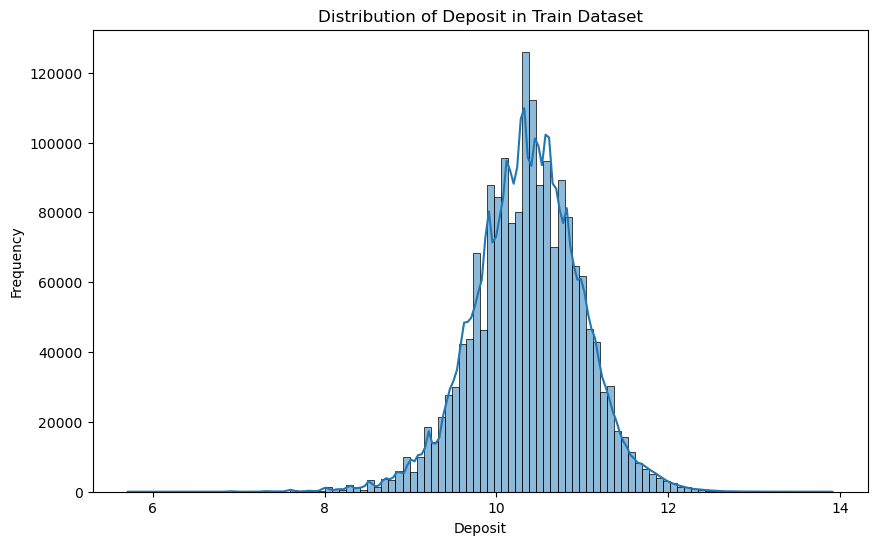

In [45]:
df_train['log_deposit'] = np.log1p(df_train['deposit'])

plt.figure(figsize=(10, 6))
sns.histplot(df_train['log_deposit'], bins=100, kde=True)
plt.title('Distribution of Deposit in Train Dataset')
plt.xlabel('Deposit')
plt.ylabel('Frequency')
plt.show()

In [36]:
# df_train의 값들을 로그 변환
df_train_log = df_train.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# 로그 변환된 area_price와 나머지 컬럼들의 상관계수 계산
correlation_with_log_area_price = df_train_log.corr()['area_price']

# 상관계수를 내림차순으로 정렬
sorted_correlation_log_area_price = correlation_with_log_area_price.sort_values(ascending=False)

# 정렬된 상관계수 출력
sorted_correlation_log_area_price

area_price                 1.000000
subway_count               0.471564
school_count               0.303006
park_count                 0.299020
nearest_subway_idx         0.198663
nearest_park_idx           0.139365
nearest_school_idx         0.123809
nearest_school_distance   -0.059121
park_area                 -0.083778
nearest_park_distance     -0.108378
nearest_subway_distance   -0.410597
Name: area_price, dtype: float64

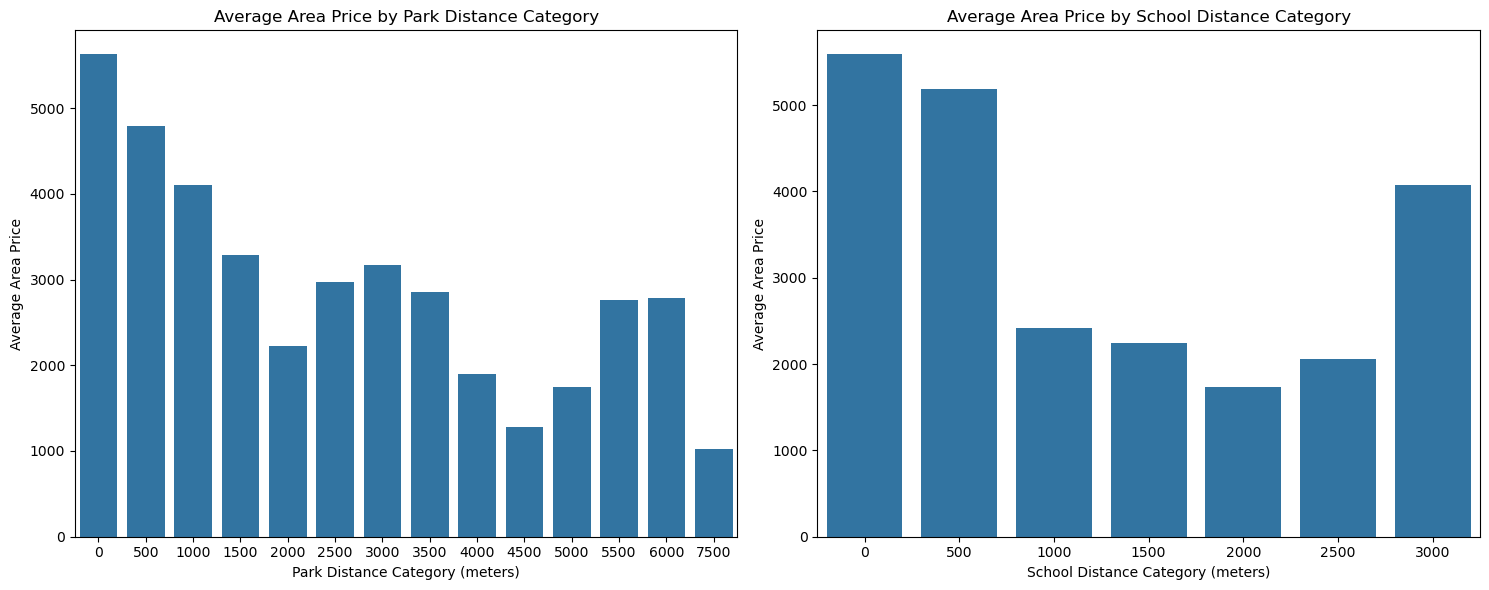

In [40]:
# nearest_park_distance와 nearest_school_distance를 250단위로 카테고리화
df_train['park_distance_category'] = ((df_train['nearest_park_distance'] // 500) * 500).astype(int)
df_train['school_distance_category'] = ((df_train['nearest_school_distance'] // 500) * 500).astype(int)

# 각 카테고리별 area_price의 평균 가격 계산
park_distance_avg_price = df_train.groupby('park_distance_category')['area_price'].mean().reset_index()
school_distance_avg_price = df_train.groupby('school_distance_category')['area_price'].mean().reset_index()

# 막대그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(ax=axes[0], x='park_distance_category', y='area_price', data=park_distance_avg_price)
axes[0].set_title('Average Area Price by Park Distance Category')
axes[0].set_xlabel('Park Distance Category (meters)')
axes[0].set_ylabel('Average Area Price')

sns.barplot(ax=axes[1], x='school_distance_category', y='area_price', data=school_distance_avg_price)
axes[1].set_title('Average Area Price by School Distance Category')
axes[1].set_xlabel('School Distance Category (meters)')
axes[1].set_ylabel('Average Area Price')

plt.tight_layout()
plt.show()

In [60]:
train["area"] = (train["area_m2"] / 3.3).round(1)
train['area_price'] = 3.3*train['deposit'] / train['area']

# df_train의 값들을 로그 변환
train_log = train.drop(columns=['_type']).apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# 로그 변환된 area_price와 나머지 컬럼들의 상관계수 계산
correlation_with_log_area_price = train_log.corr()['area_price']

# 상관계수를 내림차순으로 정렬
sorted_correlation_log_area_price = correlation_with_log_area_price.sort_values(ascending=False)

# 정렬된 상관계수 출력
sorted_correlation_log_area_price




d:\Program\Dev\ANACONDA\envs\apart\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Program\Dev\ANACONDA\envs\apart\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


area_price             1.000000
deposit                0.810500
index                  0.326656
original_index         0.326656
longitude              0.166596
built_year             0.165517
latitude               0.122025
contract_year_month    0.112920
floor                  0.110397
contract_day           0.005197
area                  -0.026742
area_m2               -0.028599
contract_type         -0.124976
age                   -0.165618
Name: area_price, dtype: float64

In [62]:
train.drop(columns=['_type']).corr()['deposit']

index                  0.217950
area_m2                0.521623
contract_year_month    0.073296
contract_day           0.007355
contract_type         -0.085880
floor                  0.132336
built_year             0.144960
latitude               0.075605
longitude              0.157374
age                   -0.136479
deposit                1.000000
original_index         0.217950
area                   0.521651
area_price             0.784147
Name: deposit, dtype: float64